In [ ]:
!pip install fiona geopandas descartes pyproj

In [1]:
import pandas as pd
import numpy as np
import math

import geopandas as gpd
import shapely.geometry as gm
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

In [2]:
high_risk = pd.read_csv('data/high_risk0.csv')

In [3]:
bm = gpd.read_file('mapdata/AdministrativeBoundariesBARMMMunicipalities20190206PSA2016.dbf',)

In [4]:
bm = bm.to_crs(epsg=4236)

/opt/conda/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [5]:
high = pd.read_csv('data/high_risk0.csv')

In [6]:
highrisk0 = gpd.GeoDataFrame(high.drop(['latitude','longitude'],axis=1), crs={'init': 'epsg:4326'} ,geometry = [gm.Point(latlong) for latlong in zip(high.longitude, high.latitude)])

AttributeError: 'AxesSubplot' object has no attribute 'show'

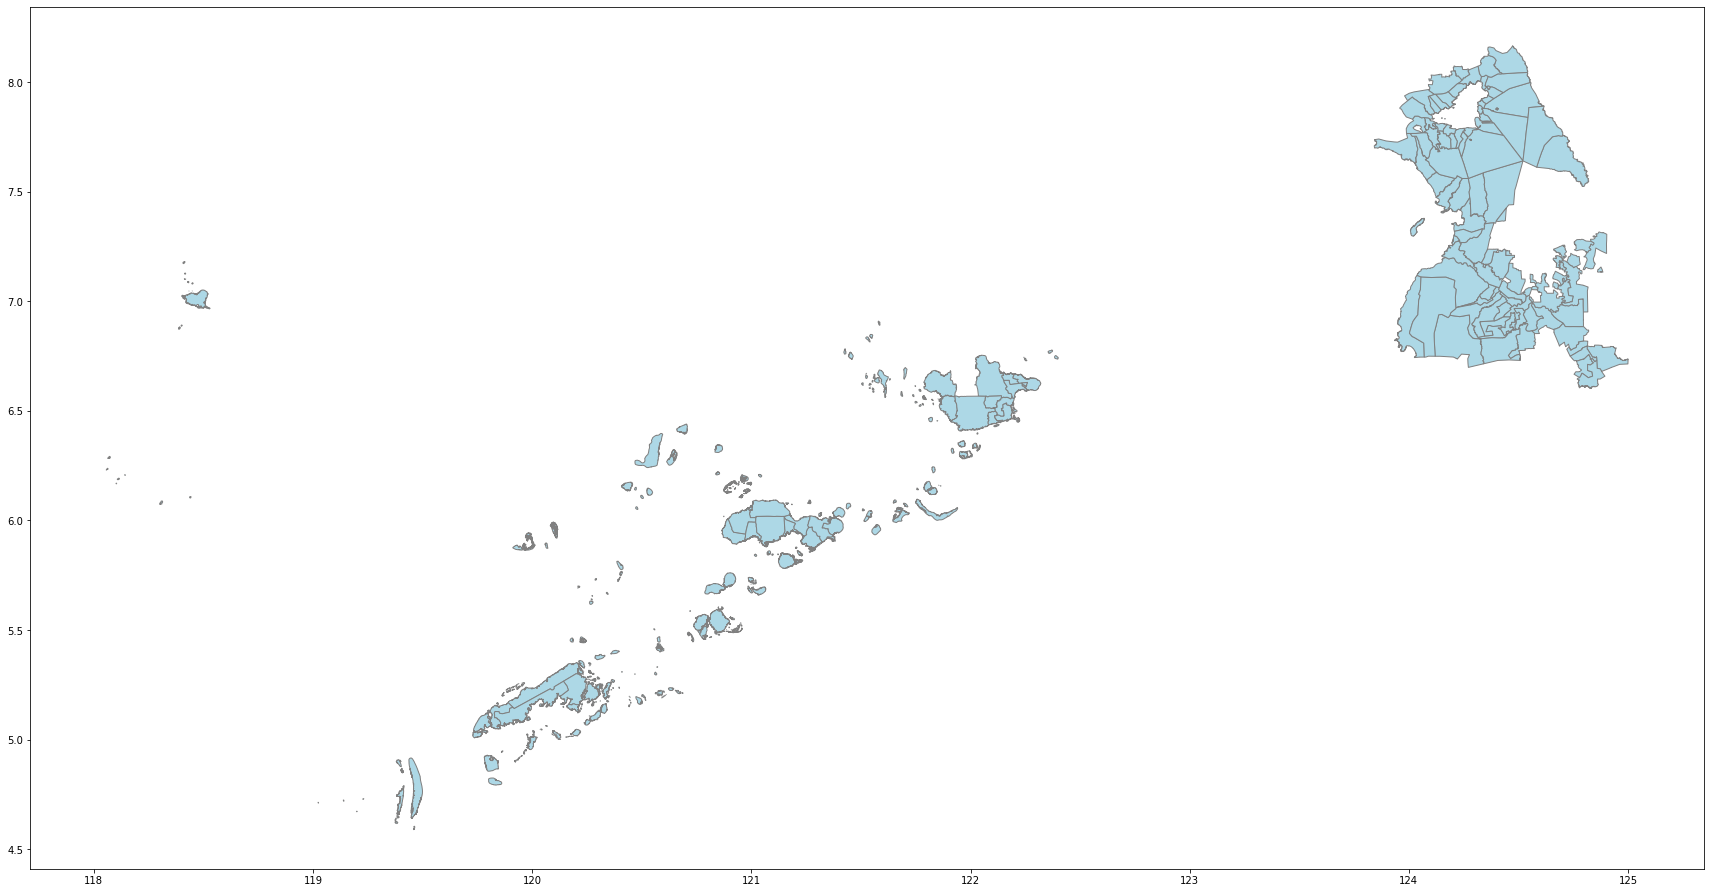

In [19]:
x = bm.plot(color='lightblue', edgecolor='gray', figsize=(30,30))

In [17]:
highrisk0.plot(ax=x, color='red')

<Figure size 432x288 with 0 Axes>

In [9]:
medrisk = pd.read_csv('data/medium.csv')

In [16]:
medrisk.plot(ax=x, color='orange')

<Figure size 432x288 with 0 Axes>

In [11]:
medrisk = gpd.GeoDataFrame(medrisk.drop(['latitude','longitude'],axis=1), crs={'init': 'epsg:4326'} ,geometry = [gm.Point(latlong) for latlong in zip(medrisk.longitude, medrisk.latitude)])

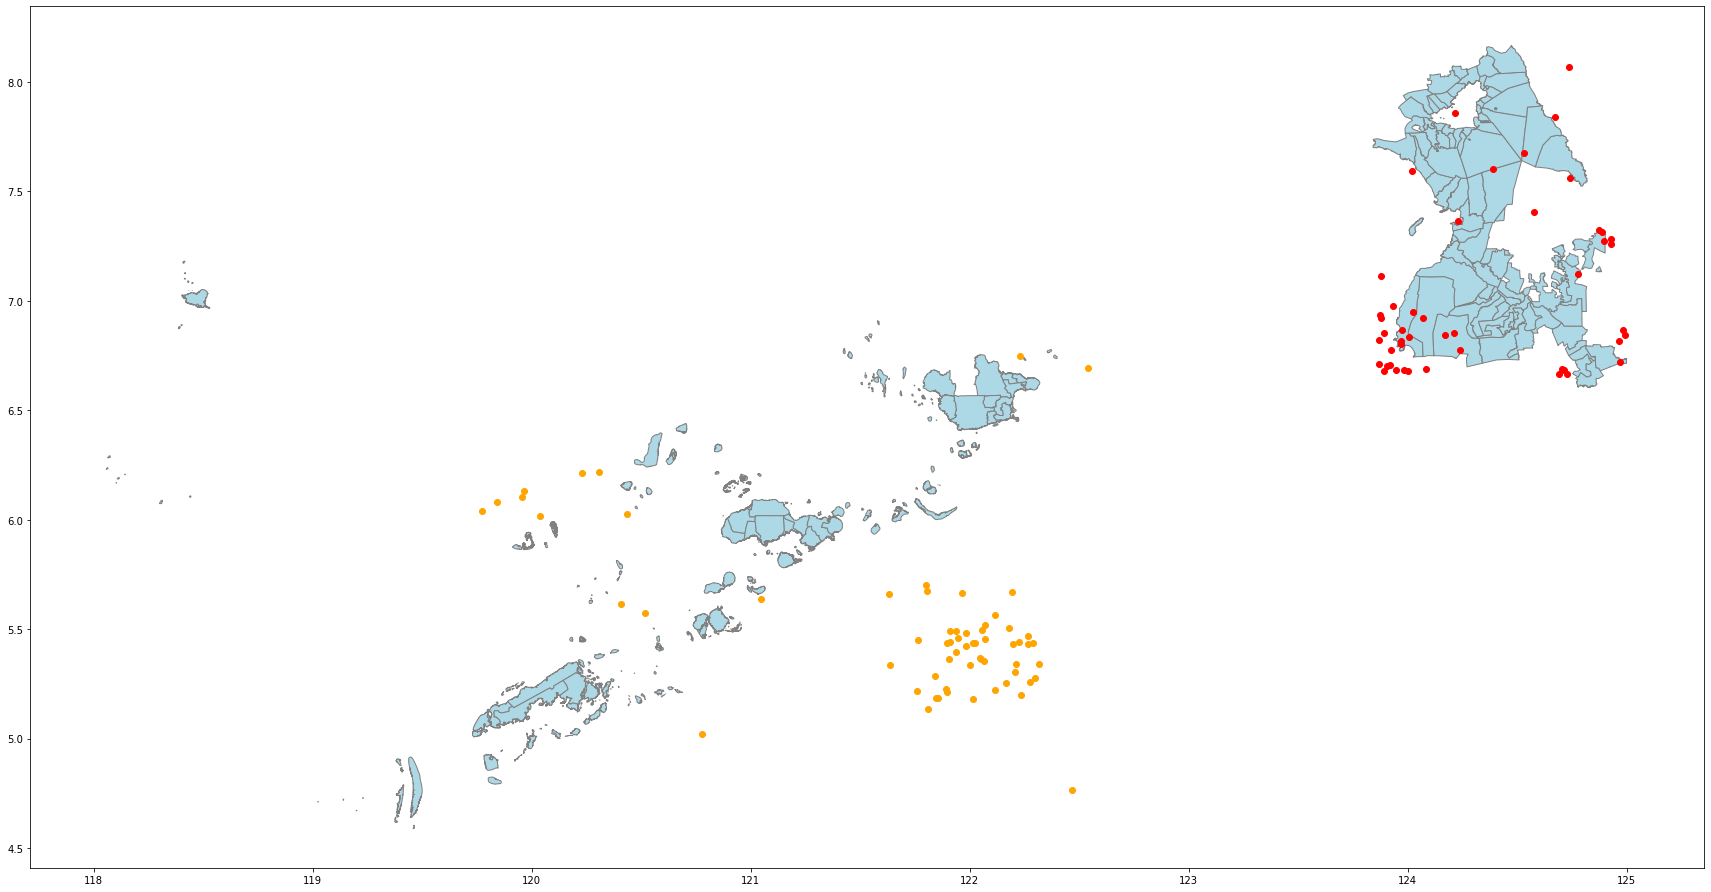

In [18]:
x.get_figure()

In [ ]:
munirisk = [min(highrisk0.distance(bm.geometry[x])) for x in range(len(bm))]

In [ ]:
munirisk = pd.Series(munirisk)

In [ ]:
munirisk.head()